# Bike Sharing Assignment

# Importing Packages

In [1]:
#Importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import calendar
import random

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

**Read the Given Data Set**

In [2]:
# Read the given csv file
bike = pd.read_csv("datasets/day.csv")

# Print the shape of dataset
print(bike.shape)

(730, 16)


In [3]:
# Print top 5 rows of dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Print information about the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Describe the dataset and print basic metrics for each column
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# check duplicates
bike[bike.duplicated()]
# no duplicates in the data set

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [7]:
# checking null values
bike.isnull().sum()
# no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# confirm that Sum of casual and registered users should be equal to the total users. 
bike[bike["casual"] + bike["registered"] != bike["cnt"]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Insights on Data Inspection
- Data set has 730 rows and 16 columns
- No duplicates in the Data set
- No null values in the Data set 
- "instant" column is a row identifier and does not have any role in model building
- "casual" + "registered" = "cnt" 
- season and weathersit looks numerical but are categorical, must be mapped accordingly

# Value Mapping

In [9]:
# Convert season from a numeric variable to a categorical variable as per data dictionary
bike["season"] = bike["season"].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

# Check if there are no season beyond the allowed values
print("Invalid Seasons = {0}".format(bike["season"].isnull().sum()))
print()

# Print the first 5 rows
bike.head()

Invalid Seasons = 0



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Convert month from a numeric to a categorical feature as per data dictionary
bike["mnth"] = bike["mnth"].apply(lambda m: calendar.month_name[m].lower())

# Check if there are no month beyond the allowed values
print("Invalid Months = {0}".format(bike["mnth"].isnull().sum()))
print()

# Print the first 5 rows
bike.head()

Invalid Months = 0



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Check if all days are assigned to weekdays properly
bike.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [12]:
# It seems to be a miss in day 3 whose value is lesser to day 2 and day 4

# Fix weekday by taking the data directly from dteday
bike["weekday"] = pd.to_datetime(bike.dteday, format="%d-%m-%Y").dt.isocalendar().day

# Check if all days are assigned to weekdays properly
print(bike.weekday.value_counts())
print()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
7    104
Name: count, dtype: Int64



In [13]:
# Convert weekday from a numeric to a categorical feature
bike["weekday"] = bike["weekday"].apply(lambda m: calendar.day_name[m-1].lower())

# Check if there are no weekday beyond the allowed values
print("Invalid Weekdays = {0}".format(bike["weekday"].isnull().sum()))
print()

# Print the first 5 rows
bike.head()

Invalid Weekdays = 0



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Convert weather from a numeric to a categorical feature
bike["weathersit"] = bike["weathersit"].map({1: "clearsky", 2: "cloudysky", 3: "lightrain", 4: "heavyrain"})

# Check if there are no weather beyond the allowed values
print("Invalid Weathers = {0}".format(bike["weathersit"].isnull().sum()))
print()

# Print the first 5 rows
bike.head()

Invalid Weathers = 0



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,monday,0,cloudysky,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,tuesday,0,cloudysky,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,wednesday,1,clearsky,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,thursday,1,clearsky,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,friday,1,clearsky,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping unncessary columns

In [15]:
# Drop dteday (unique, strictly increasing) column, and print the first 5 rows
# Drop casual, registered since "casual" + "registered" = "cnt" 
bike = bike.drop(["instant","dteday", "casual", "registered"], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,0,cloudysky,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,0,cloudysky,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clearsky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clearsky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clearsky,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualisation (EDA)

### Observations

- numerical values - yr, holiday, workingday, temp, atemp, hum, windspeed, cnt 
- categorical values - mnth, weekday, season, weathersit 
- holiday, weekday, workingday can be treated as categorical values as well

In [16]:
# Define a list of colors and palettes, and define function to choose randomly
color_list = ["seagreen", "red", "orange", "blue", "pink", "green", "brown", "darkblue", "purple", "grey"]
palette_list = ["Set1", "Set2", "Set3", "Paired", "muted", "deep", "pastel", "hls", "husl"]

random_color = lambda: random.choice(color_list)
random_palette = lambda: random.choice(palette_list)

In [17]:
# Define a function to draw a pair plot with the given features and choosing colors randomly
def draw_pair_plot(data, features, title):
    plot = sns.pairplot(data, vars=features.keys(), diag_kws={"color": random_color()}, plot_kws={"color": random_color()})
    plot.x_vars = features.values()
    plot.y_vars = features.values()
    plot._add_axis_labels()
    plot.fig.suptitle(title, y=1.03, size=15)

    plt.show()

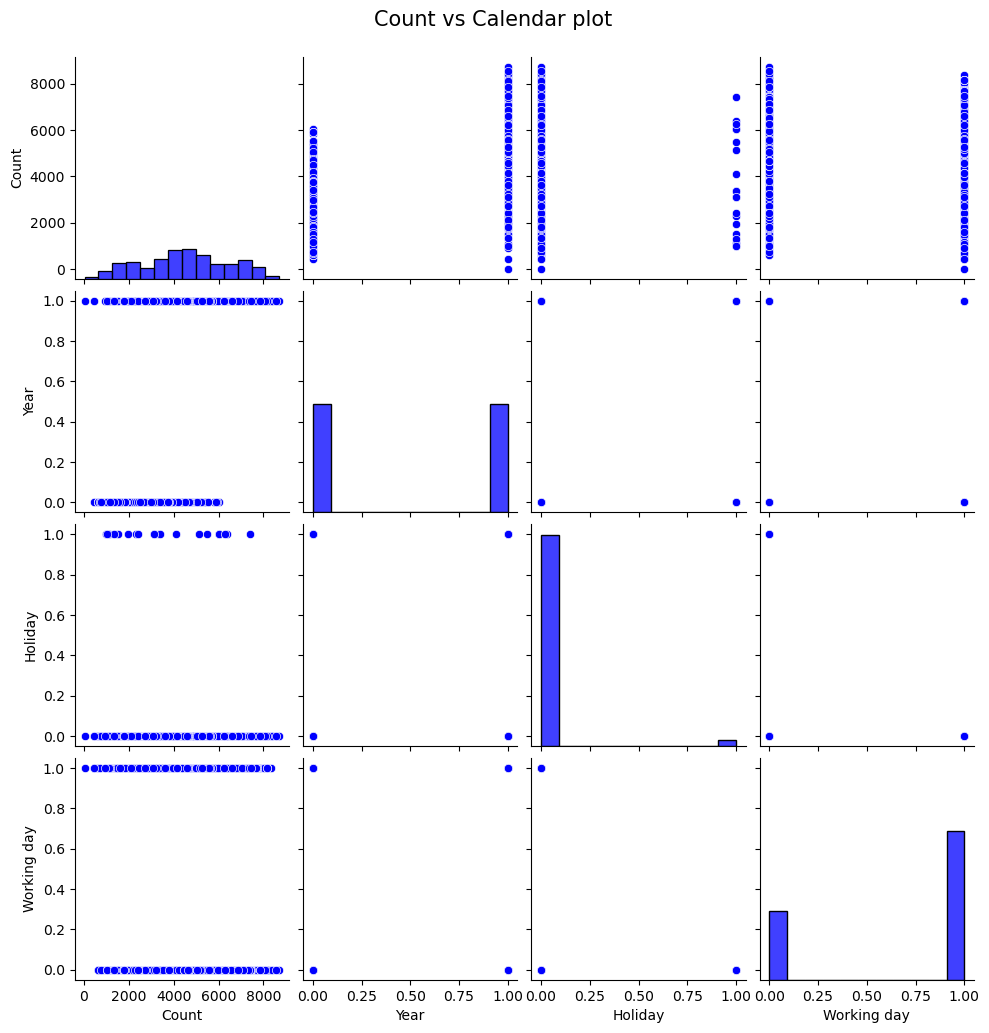

In [18]:
# Pair plot for cnt against calendar parameters like year, weekday etc
features = {
    "cnt": "Count", 
    "yr": "Year", 
    "holiday": "Holiday", 
    "workingday": "Working day"
}

draw_pair_plot(bike, features, "Count vs Calendar plot")

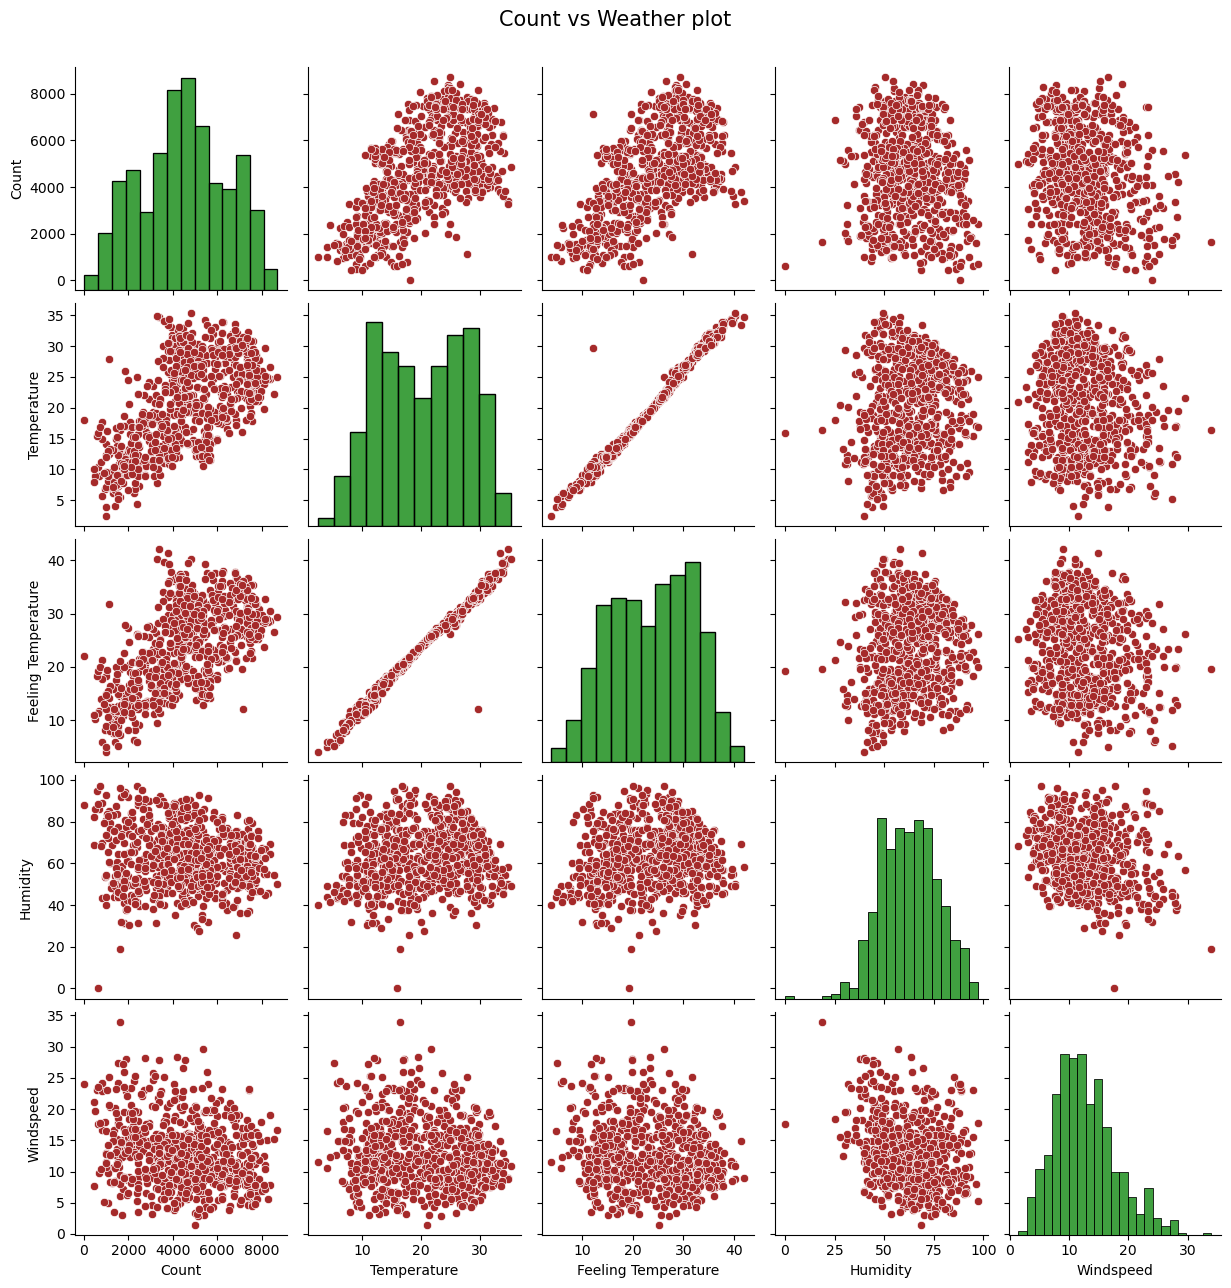

In [19]:
# Pair plot for cnt against weather features like temp, humidity etc

features = {
    "cnt": "Count", 
    "temp": "Temperature", 
    "atemp": "Feeling Temperature", 
    "hum": "Humidity", 
    "windspeed": "Windspeed"
}

draw_pair_plot(bike, features, "Count vs Weather plot")

In [20]:
# Define a function to draw box plots as subplots with the given features, labels and ticks, choosing colors randomly

def draw_box_plots(size, data, features, title, labels, ticks=None):
    fig = plt.figure(figsize=(20, size[0]*8)) # Create a new figure
    fig.suptitle(title, size=20, y=0.97) # Add a centered suptitle to the figure.

    choose_hue = lambda x: x[2] if len(x) == 3 else None

    for i in range(0, len(features)):

        plt.subplot(size[0], size[1], i+1)
        plot = sns.boxplot(x=features[i][0]
                          ,y=features[i][1]
                          ,hue=choose_hue(features[i])
                          ,data=data
                          ,palette=random_palette()
                          ,gap=0.1)

        if ticks is not None and features[i][0] in ticks:
            feature_tick = ticks[features[i][0]]
            plot.set_xticks(list(range(0, len(feature_tick))), feature_tick)

        plot.set_xlabel(labels[features[i][0]])
        plot.set_ylabel(labels[features[i][1]])

        if len(features[i]) == 3:
            handles, lbls = plot.get_legend_handles_labels()
            plot.legend(title = labels[features[i][2]], handles=handles, labels=ticks[features[i][2]])

    plt.show()

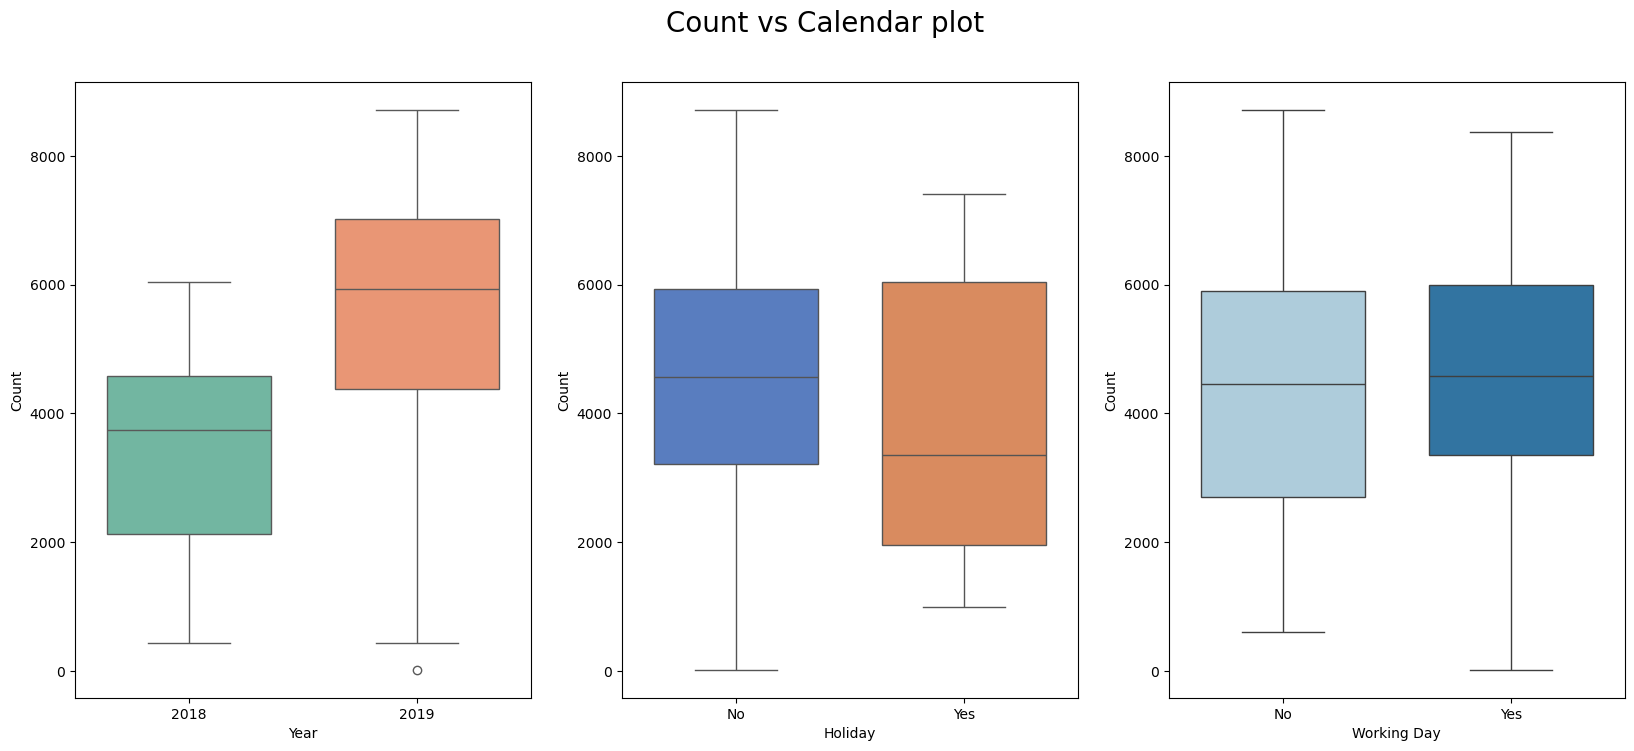

In [21]:
# Box plot for cnt against calendar parameters like year, holiday and workingday

features = [
    ["yr", "cnt"],
    ["holiday", "cnt"],
    ["workingday", "cnt"]
]

labels = {
    "yr": "Year",
    "holiday": "Holiday",
    "workingday": "Working Day",
    "cnt": "Count"
}

ticks = {
    "yr": [2018, 2019],
    "holiday": ["No", "Yes"],
    "workingday": ["No", "Yes"]
}

draw_box_plots([1,3], bike, features, "Count vs Calendar plot", labels, ticks)

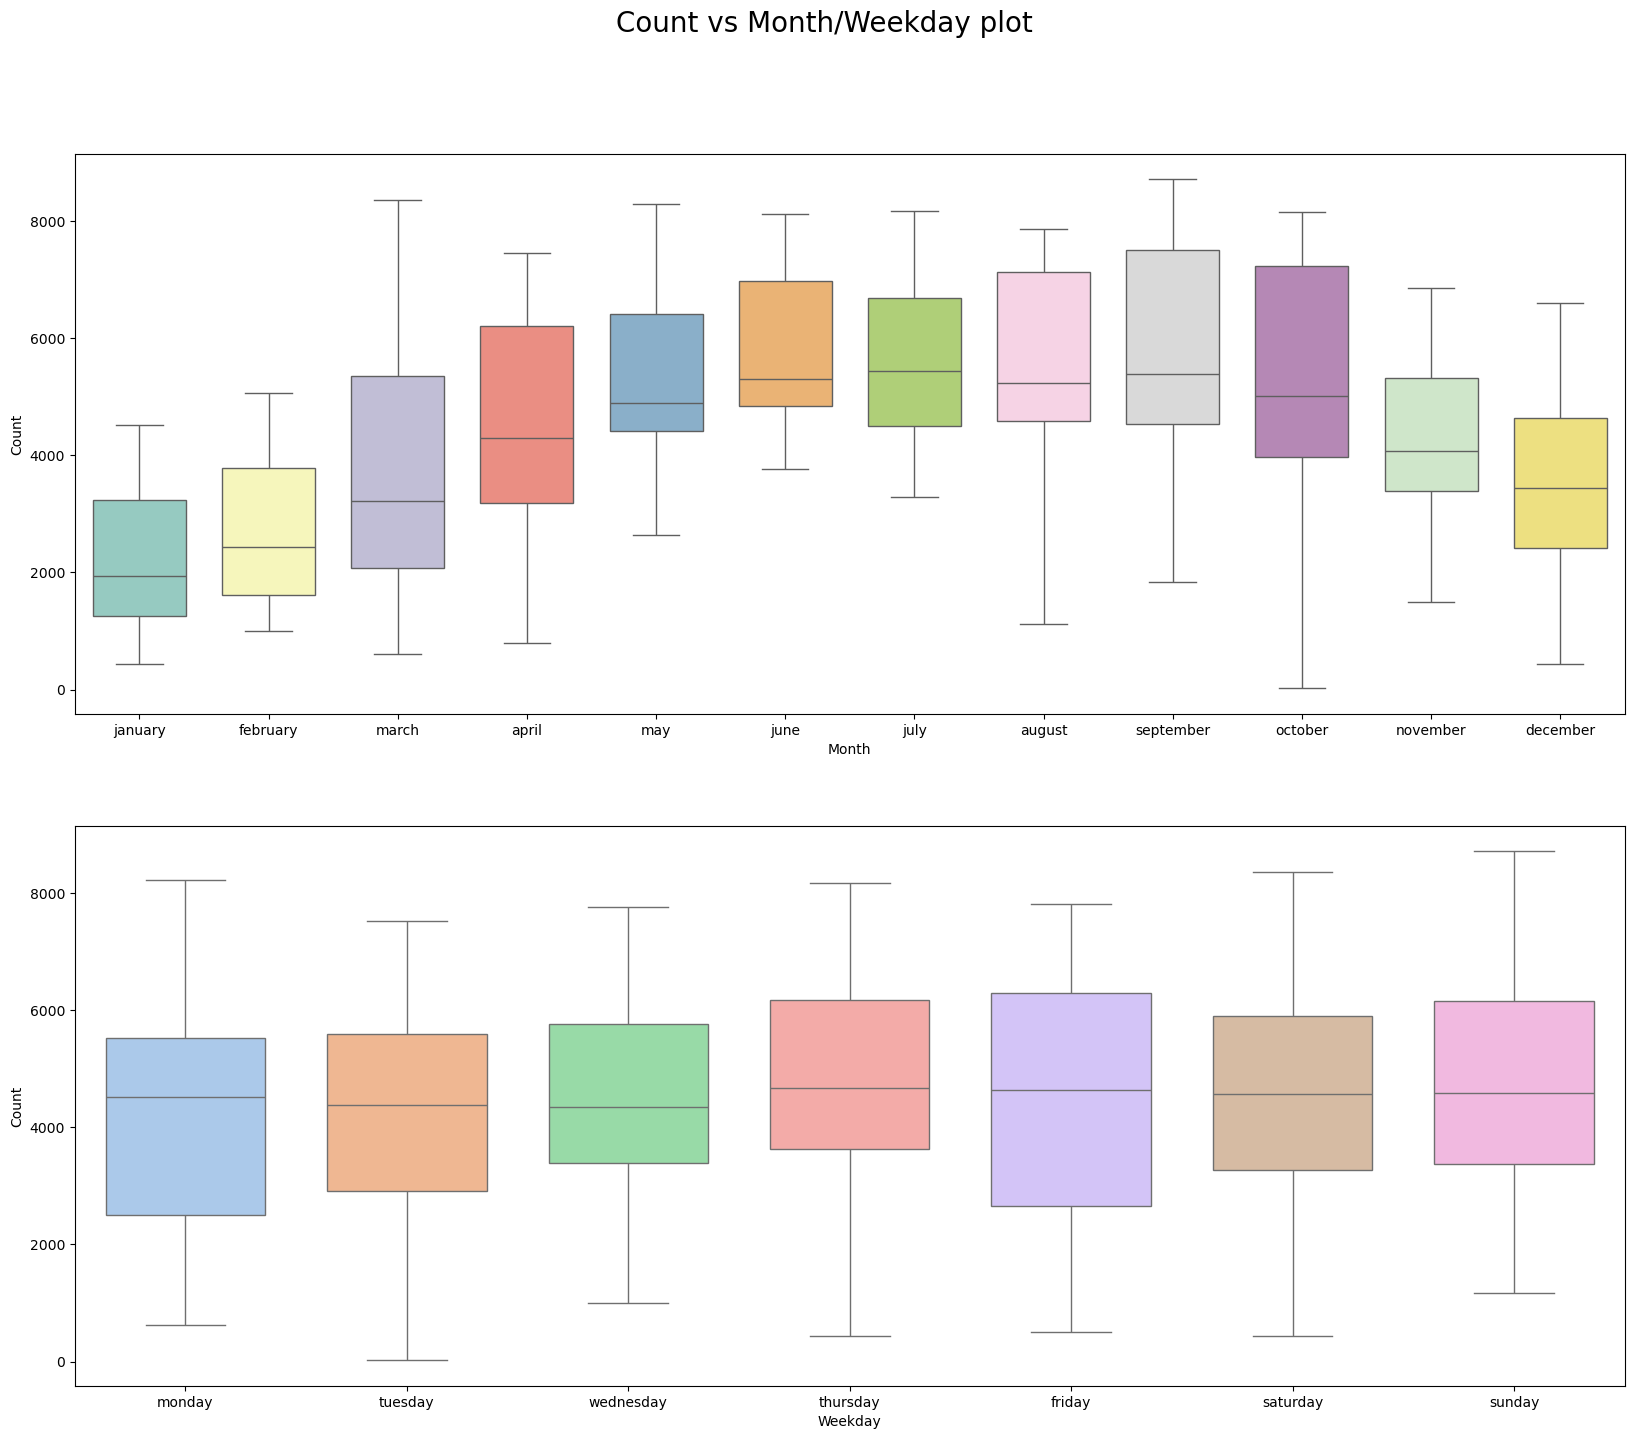

In [22]:
# Box plot for cnt against calendar parameters like month, weekday

features = [
    ["mnth", "cnt"],
    ["weekday", "cnt"]
]

labels = {
    "mnth": "Month",
    "weekday": "Weekday",
    "cnt": "Count"
}

draw_box_plots([2,1], bike, features, "Count vs Month/Weekday plot", labels)

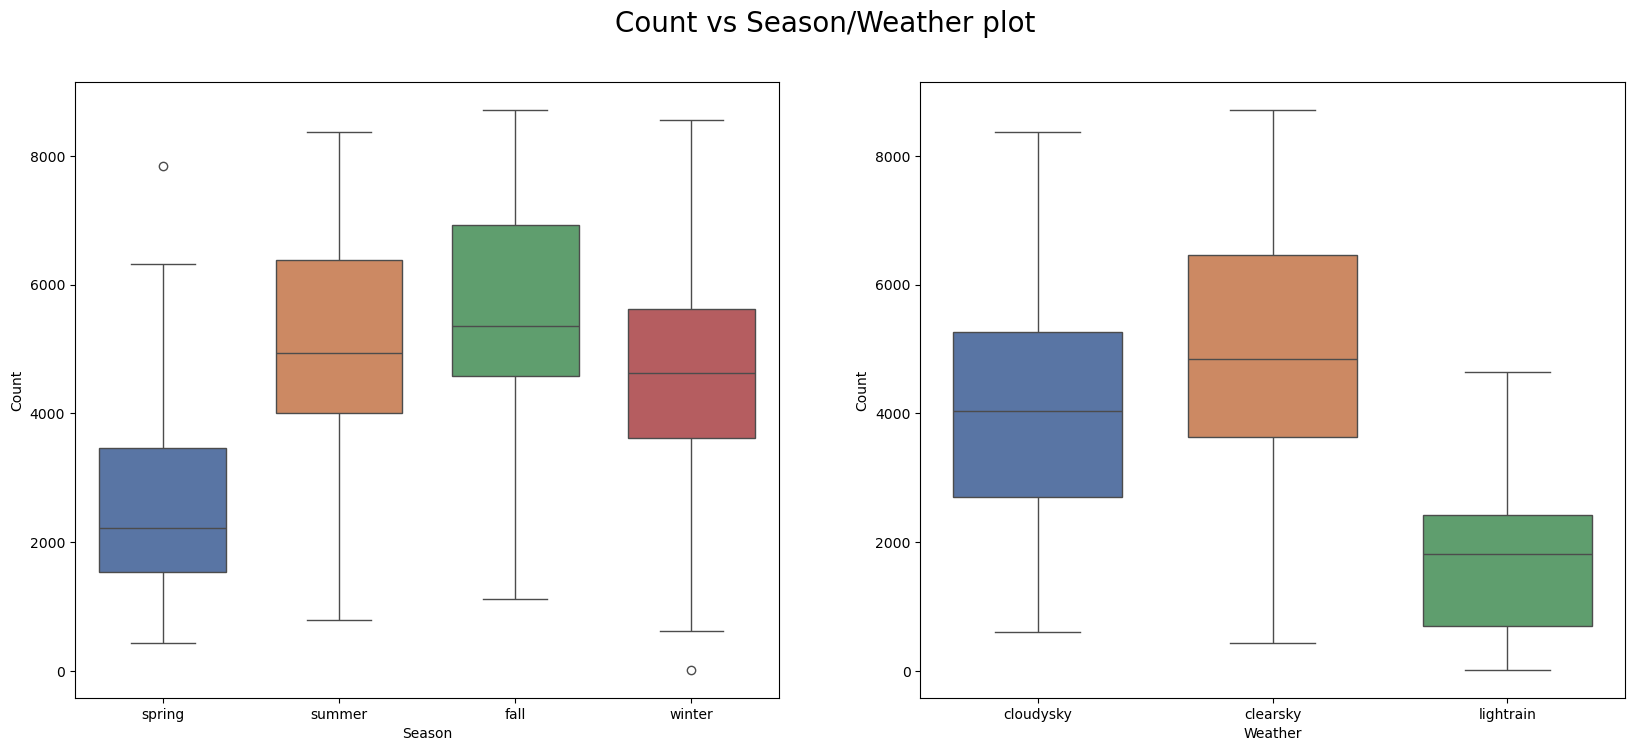

In [23]:
# Box plot for cnt against season and weather

features = [
    ["season", "cnt"],
    ["weathersit", "cnt"]
]

labels = {
    "season": "Season",
    "weathersit": "Weather",
    "cnt": "Count"
}

draw_box_plots([1,2], bike, features, "Count vs Season/Weather plot", labels)

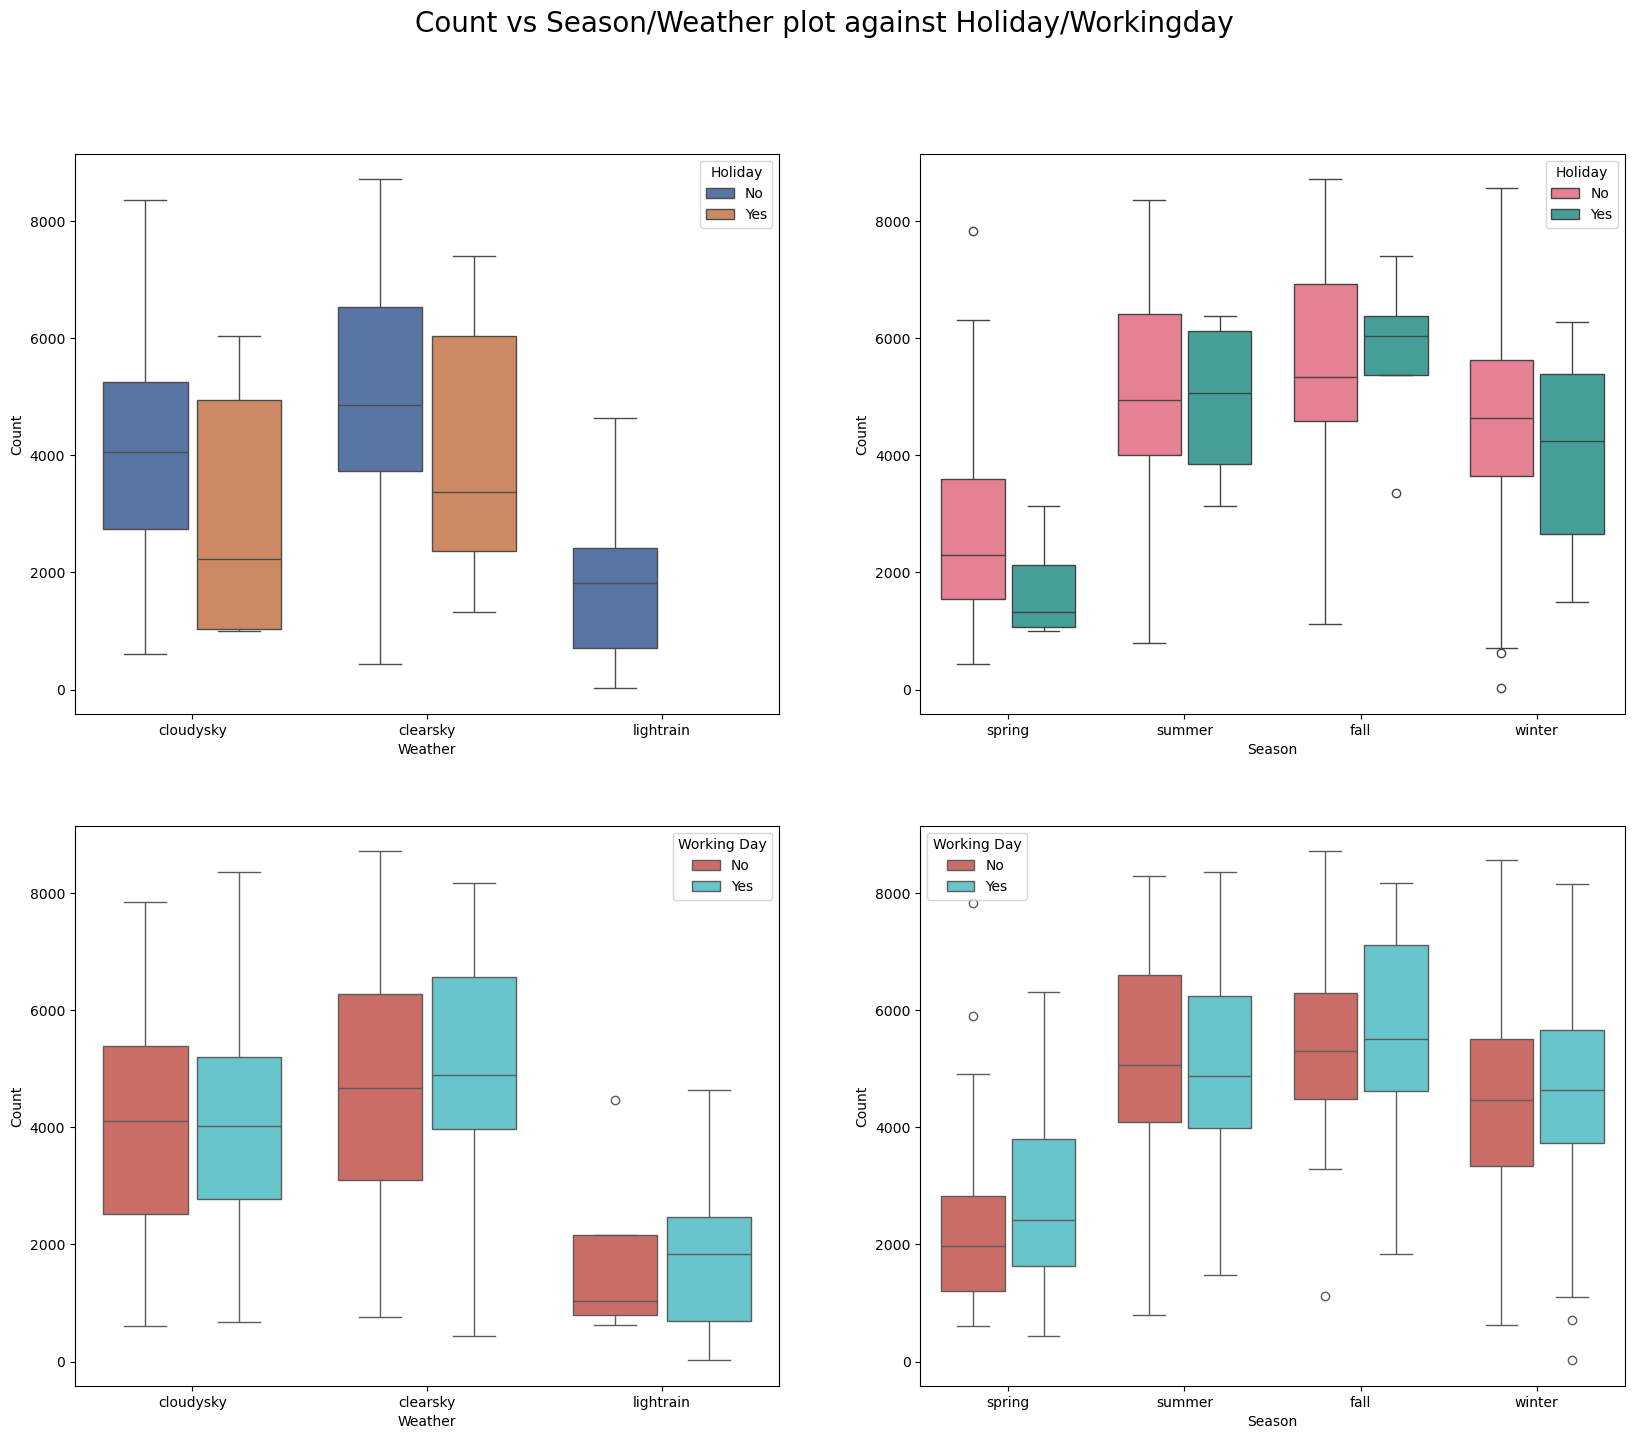

In [24]:
# Box plot for cnt against calendar parameters like month, weekday

features = [
    ["weathersit", "cnt", "holiday"],
    ["season", "cnt", "holiday"],
    ["weathersit", "cnt", "workingday"],
    ["season", "cnt", "workingday"]
]

labels = {
    "weathersit": "Weather",
    "season": "Season",
    "cnt": "Count",
    "holiday": "Holiday",
    "workingday": "Working Day"
}

ticks = {
    "holiday": ["No", "Yes"],
    "workingday": ["No", "Yes"]
}

draw_box_plots([2,2], bike, features, "Count vs Season/Weather plot against Holiday/Workingday", labels, ticks)

### Observations

- There seems to be a weak correlation between cnt and temp, cnt and atemp
- There is a strong correlation between temp and atemp
- Median count has increased significantly from 2018 to 2019
- Median and 25th percentile count decreases significantly over holidays but 75th percentile remains same
- Median count increases as the year progresses and starts decreasing again towards the end of the year
- Median count remains almost the same across all weekdays
- Median count decreases considerably in spring and on days with light rain
- Median count is considerably higher on non-holidays irrespective of weather but the same is not the same across seasons

# Data Preparation

In [25]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,0,cloudysky,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,0,cloudysky,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clearsky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clearsky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clearsky,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy variables
     for    1. season
            2. weathersit
            3. mnth
            4. weekday

In [26]:
# Create dummy features from season
season_dummy = pd.get_dummies(bike['season'], dtype="int", drop_first=True)
bike = pd.concat([bike, season_dummy], axis=1)
bike = bike.drop(["season"], axis=1)
print(season_dummy.head())
print( )
bike.head()

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0



,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,january,0,monday,0,cloudysky,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,january,0,tuesday,0,cloudysky,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,january,0,wednesday,1,clearsky,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,january,0,thursday,1,clearsky,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,january,0,friday,1,clearsky,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [27]:
# Create dummy features from weathersit
weather_dummy = pd.get_dummies(bike["weathersit"], dtype="int", drop_first=True)
bike = pd.concat([bike, weather_dummy], axis=1)
bike = bike.drop(["weathersit"], axis=1)
print(weather_dummy.head())
print( )
bike.head()

   cloudysky  lightrain
0          1          0
1          1          0
2          0          0
3          0          0
4          0          0



,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,cloudysky,lightrain
0,0,january,0,monday,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,january,0,tuesday,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,january,0,wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,january,0,thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,january,0,friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [28]:
# Create dummy features from mnth
month_dummy = pd.get_dummies(bike["mnth"], dtype="int", drop_first=True)
bike = pd.concat([bike, month_dummy], axis=1)
bike = bike.drop(["mnth"], axis=1)
print(month_dummy.head())
print( )
bike.head()

   august  december  february  january  july  june  march  may  november  \
0       0         0         0        1     0     0      0    0         0   
1       0         0         0        1     0     0      0    0         0   
2       0         0         0        1     0     0      0    0         0   
3       0         0         0        1     0     0      0    0         0   
4       0         0         0        1     0     0      0    0         0   

   october  september  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  



,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,december,february,january,july,june,march,may,november,october,september
0,0,0,monday,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tuesday,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [29]:
# Create dummy features from weekday
weekday_dummy = pd.get_dummies(bike["weekday"], dtype="int", drop_first=True)
bike = pd.concat([bike, weekday_dummy], axis=1)
bike = bike.drop(["weekday"], axis=1)
print(weekday_dummy.head())
print( )
bike.head()

   monday  saturday  sunday  thursday  tuesday  wednesday
0       1         0       0         0        0          0
1       0         0       0         0        1          0
2       0         0       0         0        0          1
3       0         0       0         1        0          0
4       0         0       0         0        0          0



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Print all the columns of the dataset
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'cloudysky', 'lightrain', 'august',
       'december', 'february', 'january', 'july', 'june', 'march', 'may',
       'november', 'october', 'september', 'monday', 'saturday', 'sunday',
       'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [31]:
# Split data into training and testing set
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

# Print top 5 records from training set
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
print('Train Set shape',bike_train.shape)
print('Test Set shape',bike_test.shape)

Train Set shape (510, 30)
Test Set shape (220, 30)


## Rescaling the Features

In [33]:
# Rescale all features which have a value other than 0 or 1
scaler = MinMaxScaler()

rescale_feats = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_train[rescale_feats] = scaler.fit_transform(bike_train[rescale_feats])

# Print first 5 rows of training set
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,0


In [34]:
# Describe the rescaled training set
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
features = ["cnt", "yr", "holiday", "workingday", "temp", "atemp", "hum", "windspeed", "spring", "summer", "winter", "cloudysky", "lightrain"]
bike_train[features].corr()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,cloudysky,lightrain
cnt,1.000000,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,-0.548987,0.140259,0.025945,-0.169715,-0.226678
yr,0.591433,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.084061,-0.000439,-0.036320,0.018294,-0.027174,-0.011388,-0.060764
holiday,-0.095948,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,0.053339,-0.063798,0.051582,-0.038895,-0.028154
workingday,0.092019,0.031808,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,-0.037932,0.046302,-0.060593,0.043563,0.021159
temp,0.645048,0.108054,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,-0.606396,0.126057,-0.234200,-0.089452,-0.036227
atemp,0.647944,0.104971,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,-0.611118,0.136550,-0.211852,-0.085086,-0.044398
hum,-0.058793,-0.084061,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.201616,-0.014192,0.173980,0.479436,0.244965
windspeed,-0.253038,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,0.180351,0.110441,-0.090740,-0.029892,0.086778
spring,-0.548987,-0.036320,0.053339,-0.037932,-0.606396,-0.611118,-0.201616,0.180351,1.000000,-0.324666,-0.324666,0.011613,-0.044558
summer,0.140259,0.018294,-0.063798,0.046302,0.126057,0.136550,-0.014192,0.110441,-0.324666,1.000000,-0.328125,0.043202,-0.045901


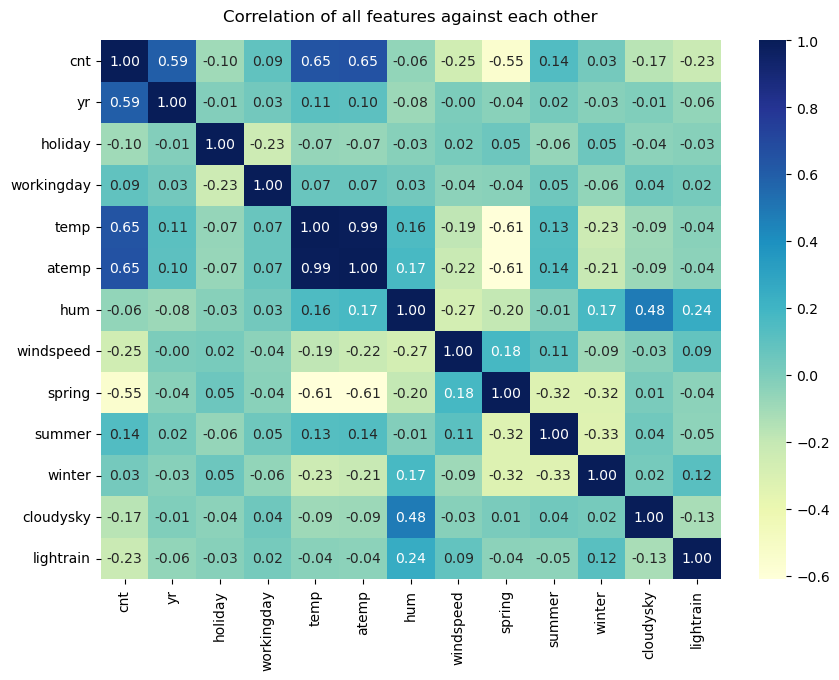

In [36]:
# Plot a heatmap of the features to see possible correlations
plt.figure(figsize = (10, 7))
sns.heatmap(bike_train[features].corr(), annot = True, fmt='.2f', cmap="YlGnBu")
plt.title("Correlation of all features against each other", y=1.02)
plt.show()

### Observations

- Count seems to be moderately positively correlated to Year, Temperature, Feeling Temperature
- Count seems to be moderately negatively correlated to Windspeed, Spring season and Light Rain Weather

# Building Linear Model

In [37]:
# Separate data into feature and target set
y_bike_train = bike_train.pop("cnt")
X_bike_train = bike_train

# Print top 5 records of feature training set
X_bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
# Function which create a linear regression model, prints important statistics and returns prepared model and updated training set
def create_lr_model(y_train, X_train):
    
    X_train_lm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_lm).fit()

    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    print("Model Parameters")
    print("================")
    print(model.params)
    print()
    print(model.summary())
    print()
    print("Variance Inflation Factor")
    print("=========================")
    print(vif)

    return model, X_train_lm

#### Model 1

In [39]:
# Create the first model with all features
model_1, X_bike_train_lm = create_lr_model(y_bike_train, X_bike_train)

Model Parameters
const         0.329747
yr            0.231623
holiday      -0.083461
workingday    0.000185
temp          0.390731
atemp         0.052804
hum          -0.157039
windspeed    -0.180980
spring       -0.040568
summer        0.045983
winter        0.111380
cloudysky    -0.057640
lightrain    -0.249130
august        0.028279
december     -0.043684
february     -0.036799
january      -0.063637
july         -0.028106
june          0.008986
march         0.000889
may           0.024868
november     -0.040744
october       0.006366
september     0.091574
monday       -0.024547
saturday      0.003832
sunday        0.009720
thursday      0.004068
tuesday      -0.025765
wednesday    -0.009436
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   

> **Observations**
> - Multiple features have high p-value and high VIF
> - Reducing features one after another will be tedious given there are 30 features
> - Next step would be to run a RFE (Recursive Feature Elimination to reach 12 features)

#### Model 2

In [40]:
# Running RFE with the number of features equal to 12
linear_model = LinearRegression()
linear_model.fit(X_bike_train, y_bike_train)

rfe = RFE(estimator = linear_model, n_features_to_select=12)
rfe = rfe.fit(X_bike_train, y_bike_train)

In [41]:
# Columns which should be part of linear model as per RFE
X_bike_train.loc[:, rfe.support_].columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'cloudysky', 'lightrain', 'july', 'september'],
      dtype='object')

In [42]:
# Update the training dataset using the rfe columns only, print the top 5 rows
X_bike_train_rfe = X_bike_train[X_bike_train.columns[rfe.support_]]
X_bike_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,cloudysky,lightrain,july,september
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,1,0,0,0


In [43]:
# Create the second model with rfe features only
model_2, X_bike_train_lm = create_lr_model(y_bike_train, X_bike_train_rfe)

Model Parameters
const        0.284754
yr           0.229357
holiday     -0.096878
temp         0.529863
hum         -0.172595
windspeed   -0.182190
spring      -0.056371
summer       0.053078
winter       0.097610
cloudysky   -0.052653
lightrain   -0.236920
july        -0.057247
september    0.083251
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.95e-190
Time:                        19:30:22   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12            

> **Observations**
> - Reducing to 12 features selected by RFE doesn't reduce the Adjusted R-squared much (only by 0.003)
> - p-values for all the features are within the permissible limit of 0.05
> - VIF for hum and temp is very high
> - Next step would be to remove hum and rebuild a new model

#### Model 3

In [44]:
# Feature hum has high VIF (28.03), it's highly correlated
# Drop hum and retrain the model

X_bike_train_updated = X_bike_train_rfe.drop("hum", axis=1)
model_3, X_bike_train_lm = create_lr_model(y_bike_train, X_bike_train_updated)

Model Parameters
const        0.199434
yr           0.233570
holiday     -0.097463
temp         0.490988
windspeed   -0.147919
spring      -0.067169
summer       0.046487
winter       0.081741
cloudysky   -0.080167
lightrain   -0.284199
july        -0.052057
september    0.076846
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.06e-187
Time:                        19:30:22   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                  

> **Observations**
> - After removing hum, in the new model adjusted R-squared has reduced by 0.006 (not significant)
> - temp still has a high VIF, while the p-values for all other features is within permissible limit
> - Next step would be to remove temp and rebuild a new model

#### Model 4

In [45]:
# Feature temp has high VIF (5.09), it's highly correlated
# Drop temp and retrain the model

X_bike_train_updated = X_bike_train_rfe.drop(["hum", "temp"], axis=1)
model_4, X_bike_train_lm = create_lr_model(y_bike_train, X_bike_train_updated)

Model Parameters
const        0.583711
yr           0.247188
holiday     -0.100456
windspeed   -0.170537
spring      -0.300492
summer      -0.044921
winter      -0.079349
cloudysky   -0.089457
lightrain   -0.295886
july        -0.012681
september    0.072716
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.02e-149
Time:                        19:30:22   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Typ

> **Obserations**
> - Adjusted R-squared in the new model after removing temp has reduced significantly by 0.07
> - Also, july has now high p-value
> - In the next model, instead of removing temp let's try to remove windspeed instead
> - Because temp would be a better measure of bike rental, higher temperature would discourage people from renting

#### Model 5

In [46]:
# Feature windspeed has high VIF (4.60), it's highly correlated
# Drop windspeed (instead of temp) and retrain the model

X_bike_train_updated = X_bike_train_rfe.drop(["hum", "windspeed"], axis=1)
model_5, X_bike_train_lm = create_lr_model(y_bike_train, X_bike_train_updated)

Model Parameters
const        0.150081
yr           0.232598
holiday     -0.100259
temp         0.502913
spring      -0.076589
summer       0.036651
winter       0.082879
cloudysky   -0.078458
lightrain   -0.298944
july        -0.052338
september    0.081182
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.71e-181
Time:                        19:30:22   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Typ

> **Observations**
> - Removing windspeed instead of temp presented a model with better adjusted R-squared (0.82 against 0.758)
> - VIF for all features is now less than 5 (within permissible limits)
> - Just for experiment, create another model by removing summer (currently having highest p-value)

#### Model 6

In [47]:
# Feature summer has p-value (0.02), highest amongst all features
# Drop summer and retrain the model

X_bike_train_updated = X_bike_train_rfe.drop(["hum", "windspeed", "summer"], axis=1)
model_6, X_bike_train_lm = create_lr_model(y_bike_train, X_bike_train_updated)

Model Parameters
const        0.195172
yr           0.233180
holiday     -0.100571
temp         0.469496
spring      -0.112165
winter       0.053423
cloudysky   -0.078124
lightrain   -0.299283
july        -0.068985
september    0.065396
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.25e-181
Time:                        19:30:22   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobus

> **Observations**
> - Adjusted R-squared has reduced insignificantly (only by 0.001)
> - p-values of all the remaining features is 0.000, which means they are all significant
> - VIF for all features is well within permissible limits
> - This should be treated as the final model for Residual Analysis

# Residual Analysis 

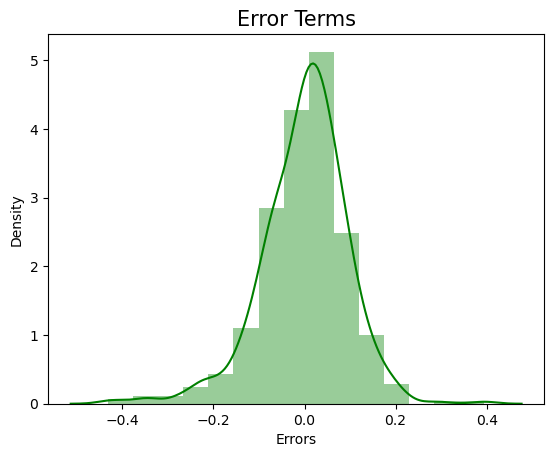

In [48]:
# Plot error terms (y-predict - y-actual) against the linear regression model
# Error terms are centered at zero and follow a normal distribution curve
y_bike_train_predict = model_6.predict(X_bike_train_lm)

sns.distplot((y_bike_train - y_bike_train_predict), bins = 15,color="g")
plt.title('Error Terms', fontsize=15)
plt.xlabel('Errors')
plt.show()

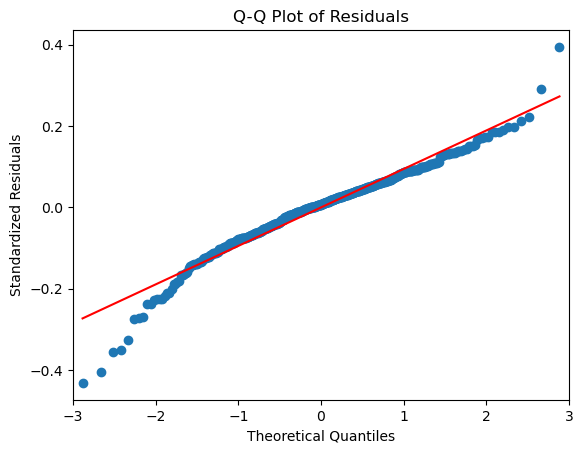

In [49]:
# Draw Q-Q plot of residuals from the final model
residuals = model_6.resid

sm.qqplot(residuals, line ='s',color='g',fmt='.g')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Predictions and Evaluation

In [50]:
# Rescale features on the test set using the transformation from the train set
bike_test[rescale_feats] = scaler.transform(bike_test[rescale_feats])

# Describe the test set post scaling
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# Separate test data into feature and target set
y_bike_test = bike_test.pop('cnt')
X_bike_test = bike_test

# Print top 5 records of feature test set
X_bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
# Creating feature test set using the columns in the final model
X_bike_test_updated = X_bike_test[X_bike_train_updated.columns]

# Adding a constant variable 
X_bike_test_updated = sm.add_constant(X_bike_test_updated)

In [53]:
# Predict the data using final model on the feature test set
y_bike_pred = model_6.predict(X_bike_test_updated)

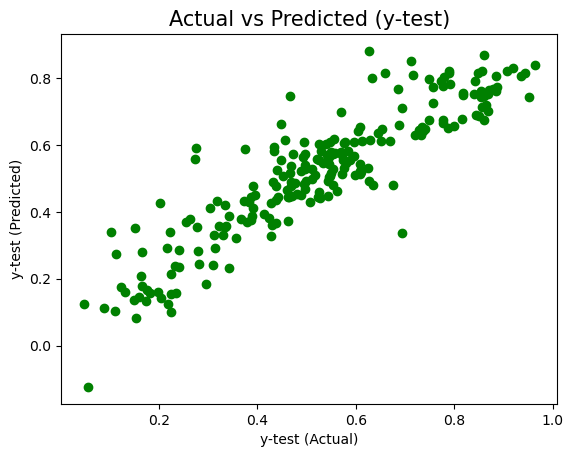

In [54]:
# Plot actual vs predicted on y-test for the final linear regression model
plt.scatter(y_bike_test, y_bike_pred,color='green')
plt.title('Actual vs Predicted (y-test)', fontsize=15)
plt.xlabel('y-test (Actual)')
plt.ylabel('y-test (Predicted)')
plt.show()

In [55]:
# Print the rsquared for y-test against y-pred
rsquared = r2_score(y_bike_test, y_bike_pred)
print("R-quared Score =", rsquared)

R-quared Score = 0.8096078487662725


**Final formula**

**0.19 + 0.47\*temp + 0.23\*yr - 0.3\*lightrain - 0.1\*holiday - 0.1\*spring - 0.08\*cloudysky - 0.07\*july + 0.06\*september + 0.05\*winter**

**Interpretation**
- Temperature a is clear factor driving bike rentals evident from highest coefficient in the formula
- As per business, there is a year-on-year increase in the bike rental service which is again visible from the coefficient
- Light Rain or Light Thunderstorm would discourage people from opting for bike rental
- Holiday and Spring season also reduces the number of bike rentals

**Bike Rentals are clearly driven as they are becoming more popular year-on-year and by the weather temperature contributing positively and light rain or thunderstorm contributing negatively.**